# Project

# Setup

In [2]:
API_KEY = ""
API_SECRET = ""

In [360]:
import tweepy
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from bs4 import BeautifulSoup
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import re
from afinn import Afinn
from textblob import TextBlob
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

auth = tweepy.AppAuthHandler(API_KEY, API_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [311]:
# Imports for metrics
from sklearn.model_selection import cross_val_score, ShuffleSplit
# Imports for stats
from scipy import stats
                       
# Convert a number to a percent.    
def pct(x):
    return round(100*x,1)

# Set up reporting
import pandas as pd
results = pd.DataFrame(columns=["ExpID", "Train Accuracy (Mean)", "Test Accuracy", "F1 score", "p-value", "Train Time(s)", "Test Time(s)", "Experiment description"])

# Set up ShuffleSplit for p_value testing
cv = ShuffleSplit(n_splits=30, test_size=0.3, random_state=0)

In [6]:
trial = pd.read_csv("dataNov25final.csv", index_col=0)
trialtweet = trial

trialtweet = trial['tweet_text'].values

trialtweet[0]

'"All the pixel killers must be in church." - My husband as he\'s waiting for a que in blackops 4'

# Getting data from Twitter

In [14]:
c = tweepy.Cursor(api.search, q="pixel 3", lang="en")
status_store=[]

for status in c.items(10000):
    tid = status.id
    tid_str = status.id_str
    retweeted = status.retweeted
    favorited = status.favorited
    #reply_count = status.reply_count
    #quote_count = status.quote_count
    created_at = status.created_at
    coordinates = status.coordinates
    user_location = status.user.location
    tweet_text = status.text
    fav_count = status.favorite_count
    retweet_count = status.retweet_count
    user_id = status.user.id
    user_name = status.user.name
    user_utc_offset = status.user.utc_offset
    followers_count = status.user.followers_count
    friends_count = status.user.friends_count
    this_tweet = [tid, tid_str, retweeted, favorited, created_at, coordinates, user_location, tweet_text, fav_count, 
                  retweet_count, user_id, user_name, user_utc_offset, followers_count,
                  friends_count]
    status_store.append(this_tweet)
print(len(status_store))
#print(status_store)

893


In [15]:
status_store[:4]

[[1067084600982339584,
  '1067084600982339584',
  False,
  False,
  datetime.datetime(2018, 11, 26, 15, 56, 9),
  None,
  'Pune, India',
  'Inside Google Marketing: Jabari Hearn explains how the ability to dream — not just data — played a part in launchin… https://t.co/qsn0XPXTCQ',
  0,
  0,
  1018730750261121024,
  'Naitik Mandot',
  None,
  32,
  23],
 [1067084340457365504,
  '1067084340457365504',
  False,
  False,
  datetime.datetime(2018, 11, 26, 15, 55, 6),
  None,
  '',
  'Night Sight Review: Pixel 3 Lite + The Ultimate Night Mode Upgrade! Webcast https://t.co/OHj7rYoOWC',
  0,
  0,
  1045912528771997696,
  'jiensmicjeak',
  None,
  119,
  692],
 [1067084266654367744,
  '1067084266654367744',
  False,
  False,
  datetime.datetime(2018, 11, 26, 15, 54, 49),
  None,
  'Mountain View, California',
  'RT @9to5toys: Google’s new Pixel Stand charges your Pixel 3 in style at $40 shipped (50% off) https://t.co/ML1KI1HEIr https://t.co/PPbJp0pX…',
  0,
  1,
  177087369,
  '9to5Google',
  

In [16]:
import pandas as pd
df = pd.DataFrame(status_store)
df.columns = ["tid", "tid_str", "retweeted", "favorited","created_at", "coordinates", "user_location", "tweet_text", "fav_count", 
                  "retweet_count", "user_id", "user_name", "user_utc_offset", "followers_count",
                  "friends_count"]

In [17]:
df.shape

(893, 15)

In [18]:
df.tail()

,tid,tid_str,retweeted,favorited,created_at,coordinates,user_location,tweet_text,fav_count,retweet_count,user_id,user_name,user_utc_offset,followers_count,friends_count
888,1066991989919428608,1066991989919428608,False,False,2018-11-26 09:48:08,None,Hyderabad,RT @VenyaGeskin1: Google Pixel 3 Lite is a sim...,0,21,94896121,gokul bhargav.,None,178,196
889,1066991755025936384,1066991755025936384,False,False,2018-11-26 09:47:12,None,Timbó/SC,Google Pixel 3 XL international giveaway! http...,0,0,361813637,Ivan Petermann,None,21,19
890,1066991737938145280,1066991737938145280,False,False,2018-11-26 09:47:08,None,,Will #GetOutoftheRed include the pixel 3 @TMob...,0,0,14925066,Gabe Jesus,None,256,598
891,1066991662621048832,1066991662621048832,False,False,2018-11-26 09:46:50,None,,Google Pixel 3 XL international giveaway! http...,0,0,55408556,Shilton Jonatan,None,254,383
892,1066991623442259969,1066991623442259969,False,False,2018-11-26 09:46:41,None,"Rio de Janeiro, Brazil",Google Pixel 3 XL international giveaway! http...,0,0,104962164,Marcorélio Soares,None,34,477


In [19]:
df.to_csv("dataset1_pixel3nov25_2.csv")

In [18]:
c = tweepy.Cursor(api.search, q="pixel", lang="en")
status_store1=[]

for status in c.items(10000):
    created_at = status.created_at
    coordinates = status.coordinates
    user_location = status.user.location
    tweet_text = status.text
    fav_count = status.favorite_count
    retweet_count = status.retweet_count
    user_id = status.user.id
    user_name = status.user.name
    user_utc_offset = status.user.utc_offset
    followers_count = status.user.followers_count
    friends_count = status.user.friends_count
    this_tweet = [created_at, coordinates, user_location, tweet_text, fav_count, 
                  retweet_count, user_id, user_name, user_utc_offset, followers_count,
                  friends_count]
    status_store1.append(this_tweet)
print(len(status_store1))
#print(status_store)

Rate limit reached. Sleeping for: 835


6478


In [22]:
df1 = pd.DataFrame(status_store1)
df1.columns = ["created_at", "coordinates", "user_location", "tweet_text", "fav_count", 
                  "retweet_count", "user_id", "user_name", "user_utc_offset", "followers_count",
                  "friends_count"]

In [25]:
df1.tail()

,created_at,coordinates,user_location,tweet_text,fav_count,retweet_count,user_id,user_name,user_utc_offset,followers_count,friends_count
6473,2018-11-18 11:11:49,None,"Hope, Indiana",Coloring by numbers is fun with Pixel Art! htt...,0,0,53339713,SherylMcQueenFreeman,None,296,2788
6474,2018-11-18 11:11:40,None,,RT @vivo_malaysia: With V11's Dual Pixel Senso...,0,532,1063878016076472321,ذهني,None,4,0
6475,2018-11-18 11:11:36,None,"Chicago, IL",RT @ohnePixel: 🥳GIVEAWAY TIME🥳\n\nTo win this ...,0,281,103150623,rone,None,654,256
6476,2018-11-18 11:11:31,None,"Vancouver, British Columbia",RT @FieryFN: Naruto Headband Pixel Art\nthis t...,0,5,3265347685,Rehman mann,None,20,118
6477,2018-11-18 11:11:18,None,Salem,@IndiaPOCO 1.Snapdragon 845 Processor 🔥🔥🔥\n\n2...,0,0,732090558106079237,Mersal mohan,None,213,504


In [24]:
df1.to_csv("dataset1_pixelnov19_2.csv")

# Dataset preparation

## Combine data pulled at different time frame

In [25]:
pixel12 = pd.read_csv("dataset1_pixel3nov12.csv", index_col=0)
pixel18 = pd.read_csv("dataset1_pixelnov18_1.csv", index_col=0)

In [26]:
pixel12.head()

,created_at,coordinates,user_location,tweet_text,fav_count,retweet_count,user_id,user_name,user_utc_offset,followers_count,friends_count
0,2018-11-13 07:03:57,NaN,"New Delhi, India",RT @TechnicalGuruji: Good Morning 🙂...Night Si...,0,127,792702964959813632,💝Chandramani 💝Kumar 💞,NaN,7640,5488
1,2018-11-13 07:03:23,NaN,Nigeria/Ghana,"RT @mohinii_u: Yesterday, I dropped by #GTBank...",0,32,851350928,O,NaN,676,264
2,2018-11-13 07:02:42,NaN,Malaysia,RT @Ashril_92: Damn Pixel 3 😩😭❤️ https://t.co/...,0,9270,1124217710,Farah☁️,NaN,471,287
3,2018-11-13 07:01:36,NaN,"Kurla East, Mumbai",RT @androidcentral: The Google Pixel 3 XL is o...,0,6,4631963172,JAVED SHAIKH(JAFF_!),NaN,96,108
4,2018-11-13 07:00:07,NaN,"Kurla East, Mumbai",RT @androidcentral: No one wants to hide their...,0,3,4631963172,JAVED SHAIKH(JAFF_!),NaN,96,108


In [27]:
print(pixel18.shape)
print(pixel12.shape)

(7001, 11)
(1090, 11)


In [28]:
data12n18 = pd.concat([pixel18,pixel12])

In [29]:
data12n18.shape

(8091, 11)

In [31]:
data12n18.tail()

,created_at,coordinates,user_location,tweet_text,fav_count,retweet_count,user_id,user_name,user_utc_offset,followers_count,friends_count
1085,2018-11-12 13:16:05,NaN,VENEZUELA,Pixel 3 tips and tricks: Getting the most from...,0,0,388912217,"PC-PLANET, S.A.",NaN,1267,997
1086,2018-11-12 13:15:31,NaN,Geneva,The Pixel 3 is not an iPhone killer. But if yo...,0,0,88403945,Gabriel Hussy 🔁,NaN,2706,1382
1087,2018-11-12 13:15:00,NaN,Kuala Lumpur,RT @WIRED: The Pixel 3 is not an iPhone killer...,0,8,336983384,Kemto,NaN,582,493
1088,2018-11-12 13:14:25,NaN,Pakistan,Google Pixel 3 XL Price And Specification http...,0,0,783964976352460800,Content.PK,NaN,87,20
1089,2018-11-12 13:14:01,NaN,Pakistan,RT @WIRED: The Pixel 3 is not an iPhone killer...,0,8,1060449761084420096,TechGeek2K,NaN,15,45


In [32]:
data12n18f = data12n18.groupby(['tweet_text']).apply(lambda x: x.sort_values('user_name')).reset_index(drop=True)

In [50]:
data12n18f.shape

NameError: name 'data12n18f' is not defined

## Remove duplicates

In [34]:
data12n18final = data12n18f.drop_duplicates(subset=['tweet_text'], keep='first')

In [35]:
data12n18final.shape

(5266, 11)

In [36]:
data12n18final.to_csv("data12n18final.csv")

In [20]:
pixelNov13_1 = pd.read_csv("dataset1_pixelxlnov13.csv", index_col=0)
pixelNov13_2 = pd.read_csv("dataset1_pixelxlnov13_2.csv", index_col=0)

#pixel12.head()

print(pixelNov13_1.shape)
print(pixelNov13_2.shape)

data13 = pd.concat([pixelNov13_1,pixelNov13_2])

print(data13.shape)

#data1.tail()

dataNov13 = data13.groupby(['tweet_text']).apply(lambda x: x.sort_values('user_name')).reset_index(drop=True)

print(dataNov13.shape)

dataNov13final = dataNov13.drop_duplicates(subset=['tweet_text'], keep='first')

print(dataNov13final.shape)

(4779, 11)
(4701, 11)
(9480, 11)
(9480, 11)
(4188, 11)


In [22]:
dataNov13final.to_csv("dataNov13final.csv")

In [37]:
pixelNov17_1 = pd.read_csv("dataset1_pixelxlnov17_1.csv", index_col=0)
pixelNov17_2 = pd.read_csv("dataset1_pixel3nov17_1.csv", index_col=0)

print(pixelNov17_1.shape)
print(pixelNov17_2.shape)

data17 = pd.concat([pixelNov17_1,pixelNov17_2])

print(data17.shape)

dataNov17 = data17.groupby(['tweet_text']).apply(lambda x: x.sort_values('user_name')).reset_index(drop=True)

print(dataNov17.shape)

dataNov17final = dataNov17.drop_duplicates(subset=['tweet_text'], keep='first')

print(dataNov17final.shape)

(4918, 11)
(9882, 11)
(14800, 11)
(14800, 11)
(9316, 11)


In [38]:
dataNov17final.to_csv("dataNov17final.csv")

In [48]:
#pixelNov19_1 = pd.read_csv("dataset1_pixelnov19_1.csv", index_col=0)
#pixelNov19_2 = pd.read_csv("dataset1_pixelnov19_2.csv", index_col=0)

pixelNov19_1 = pd.read_csv("dataset1_pixelnov19_1_new.csv", index_col=0)
pixelNov19_2 = pd.read_csv("dataset1_pixelnov19_2_new.csv", index_col=0)

print(pixelNov19_1.shape)
print(pixelNov19_2.shape)

data19 = pd.concat([pixelNov19_1,pixelNov19_2])

print(data19.shape)

dataNov19 = data19.groupby(['tweet_text']).apply(lambda x: x.sort_values('user_name')).reset_index(drop=True)

print(dataNov19.shape)

dataNov19final = dataNov19.drop_duplicates(subset=['tweet_text'], keep='first')

print(dataNov19final.shape)

(6479, 18)
(6479, 18)
(12958, 18)
(12958, 18)
(4496, 18)


In [50]:
dataNov19final.head()

,created_at,coordinates,user_location,tweet_text,fav_count,retweet_count,user_id,user_name,user_utc_offset,followers_count,friends_count,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,2018-11-19 05:31:48,NaN,sc,marchieeeeee,RT @Ashril_92: Full Tank Chicken Chop 🤤🤤\n\nCh...,0,600,1159748726,nekbat♡,NaN,1238,396,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-11-18 21:09:41,NaN,parody,not her !,@xersivx PIXEL PUSSY LMFAOOOOOO,0,0,9.82804650373075E+017,muva. 💋,NaN,1869,516,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-11-18 17:00:06,NaN,"Portland, OR","""Aiming to be more transparent about ad target...",1,1,619411599,Lytics,NaN,1176,719,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2018-11-18 19:09:08,NaN,"40.43729000,-3.680233000","""I agree to receive news, updates, promotions ...",0,0,766929,Miguel Angel Moro,NaN,3225,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2018-11-19 02:38:20,NaN,"Marylandonia, Yuesei","""I don't feel like getting out my tablet or sc...",0,0,12449372,A. Lee,NaN,48,151,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
dataNov19fin = dataNov19final.drop(columns = ["Unnamed: 12", "Unnamed: 13", "Unnamed: 14", "Unnamed: 15", "Unnamed: 16", "Unnamed: 17", "Unnamed: 18" ])

In [53]:
dataNov19fin.head()

,created_at,coordinates,user_location,tweet_text,fav_count,retweet_count,user_id,user_name,user_utc_offset,followers_count,friends_count
0,2018-11-19 05:31:48,NaN,sc,marchieeeeee,RT @Ashril_92: Full Tank Chicken Chop 🤤🤤\n\nCh...,0,600,1159748726,nekbat♡,NaN,1238
2,2018-11-18 21:09:41,NaN,parody,not her !,@xersivx PIXEL PUSSY LMFAOOOOOO,0,0,9.82804650373075E+017,muva. 💋,NaN,1869
4,2018-11-18 17:00:06,NaN,"Portland, OR","""Aiming to be more transparent about ad target...",1,1,619411599,Lytics,NaN,1176,719
6,2018-11-18 19:09:08,NaN,"40.43729000,-3.680233000","""I agree to receive news, updates, promotions ...",0,0,766929,Miguel Angel Moro,NaN,3225,99
8,2018-11-19 02:38:20,NaN,"Marylandonia, Yuesei","""I don't feel like getting out my tablet or sc...",0,0,12449372,A. Lee,NaN,48,151


In [54]:
dataNov19fin.shape

(4496, 11)

In [55]:
dataNov19fin.to_csv("dataNov19final.csv")

In [49]:
pixelNov25_1 = pd.read_csv("dataset1_pixelxlnov25_1.csv", index_col=0)
pixelNov25_2 = pd.read_csv("dataset1_pixel3nov25_2.csv", index_col=0)

print(pixelNov25_1.shape)
print(pixelNov25_2.shape)

data25 = pd.concat([pixelNov25_1,pixelNov25_2])

print(data25.shape)

dataNov25 = data25.groupby(['tweet_text']).apply(lambda x: x.sort_values('user_name')).reset_index(drop=True)

print(dataNov25.shape)

dataNov25final = dataNov25.drop_duplicates(subset=['tweet_text'], keep='first')

print(dataNov25final.shape)

(10000, 15)
(893, 15)
(10893, 15)
(10893, 15)
(6465, 15)


In [57]:
dataNov25fin = dataNov25final.drop(columns = ["tid", "tid_str", "retweeted", "favorited"])

In [60]:
dataNov25fin.shape

(6465, 11)

In [61]:
dataNov25fin.to_csv("dataNov25final.csv")

In [62]:
pixelNov13final = pd.read_csv("dataNov13final.csv", index_col=0)
pixelNov12n18final = pd.read_csv("data12n18final.csv", index_col=0)
dataNov17final = pd.read_csv("dataNov17final.csv", index_col=0)
dataNov19final = pd.read_csv("dataNov19final.csv", index_col=0)
dataNov25final = pd.read_csv("dataNov25final.csv", index_col=0)

datacom = pd.concat([pixelNov13final,pixelNov12n18final, dataNov17final, dataNov19final, dataNov25final])

print(datacom.shape)

datafin = datacom.groupby(['tweet_text']).apply(lambda x: x.sort_values('user_name')).reset_index(drop=True)

print(datafin.shape)

datafinal = datafin.drop_duplicates(subset=['tweet_text'], keep='first')

print(datafinal.shape)

(29731, 11)
(29731, 11)
(25826, 11)


In [63]:
datafinal.to_csv("finaldataset.csv")

# Exploratory data analysis

In [135]:
Data_pixel = pd.read_csv("dataNov25final.csv", index_col=0)

In [136]:
Data_pixel.head()

,created_at,coordinates,user_location,tweet_text,fav_count,retweet_count,user_id,user_name,user_utc_offset,followers_count,friends_count
0,2018-11-25 16:43:50,NaN,"Missouri, USA","""All the pixel killers must be in church."" - M...",0,0,1044482040027115520,lisamarie81,NaN,211,392
1,2018-11-25 06:42:34,NaN,"Lagos, Nigeria","""Allah has the picture, we've only got a pixel...",0,0,1782823832,Sodrudeen,NaN,37,166
2,2018-11-26 00:27:40,NaN,San Francisco/New York,"""Allow me to make that dinner reservation for ...",32,11,1344951,WIRED,NaN,10351712,345
3,2018-11-26 00:28:35,NaN,"Lyon, France","""Allow me to make that dinner reservation for ...",0,0,44607361,ben carpano,NaN,1053,701
4,2018-11-26 00:29:25,NaN,Geneva,"""Allow me to make that dinner reservation for ...",0,0,88403945,Gabriel Hussy 🔁,NaN,2710,1383


In [137]:
Data_pixel = Data_pixel.drop(columns = ["created_at", "coordinates", "user_location", "fav_count", 
                  "retweet_count", "user_id", "user_name", "user_utc_offset", "followers_count",
                  "friends_count"])

In [138]:
Data_pixel.head()

,tweet_text
0,"""All the pixel killers must be in church."" - M..."
1,"""Allah has the picture, we've only got a pixel..."
2,"""Allow me to make that dinner reservation for ..."
3,"""Allow me to make that dinner reservation for ..."
4,"""Allow me to make that dinner reservation for ..."


In [139]:
Data_pixel.shape

(6465, 1)

In [140]:
Data_pixel.head()

,tweet_text
0,"""All the pixel killers must be in church."" - M..."
1,"""Allah has the picture, we've only got a pixel..."
2,"""Allow me to make that dinner reservation for ..."
3,"""Allow me to make that dinner reservation for ..."
4,"""Allow me to make that dinner reservation for ..."


## Average length of tweets

In [141]:
Data_pixel['pre_clean_len'] = [len(t) for t in Data_pixel.tweet_text]

In [142]:
Data_pixel.shape

(6465, 2)

In [143]:
df = Data_pixel

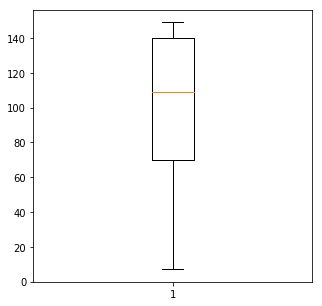

In [144]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df.pre_clean_len)
plt.show()

In [145]:
df.head()

,tweet_text,pre_clean_len
0,"""All the pixel killers must be in church."" - M...",95
1,"""Allah has the picture, we've only got a pixel...",69
2,"""Allow me to make that dinner reservation for ...",90
3,"""Allow me to make that dinner reservation for ...",90
4,"""Allow me to make that dinner reservation for ...",90


In [146]:
df[df.pre_clean_len > 140].head(10)


,tweet_text,pre_clean_len
68,#Splatoon2 #NintendoSwitch Looky what we have ...,143
128,--&gt; The abyss waves back.\n\nthing for @Fle...,143
252,@AndroidAuth @DGiTDaily\nDone all steps ☑️ ☑️\...,144
319,@BestBuy you took money for your pixel 3xl and...,144
402,@DatNaturalHigh try this one. It's the one I'v...,144
505,@Hipsterrrific Because no one will buy Samsung...,144
613,@LAGTVMB It’s not you Jeoff. There’s some doub...,144
1522,@nmiltner Our last 2 phones for the kids were ...,144
1700,@sramkrishna @ebassi I guess some people are u...,144
1703,@stephn_r @madebygoogle Good luck. All the loy...,144


## Look for NULL values

In [147]:
# Check for null values
np.sum(df.isnull().any(axis=1))

0

In [148]:
#drop null values
#training.dropna(inplace=True)
#training.reset_index(drop=True,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6465 entries, 0 to 10892
Data columns (total 2 columns):
tweet_text       6465 non-null object
pre_clean_len    6465 non-null int64
dtypes: int64(1), object(1)
memory usage: 151.5+ KB


# Training Dataset

In [21]:
training = pd.read_csv("training.csv", names=["polarity", "tid", "date", "query", "user", "text"], encoding="latin1")

In [22]:
#from sklearn.feature_extraction.text import TfidfVectorizer

#tv = TfidfVectorizer(min_df=50)
#X = tv.fit_transform(training['text'])

In [23]:
training.shape

(10000, 6)

In [128]:
training.tail()

,polarity,tid,date,query,user,text
9995,0,1468963068,Tue Apr 07 04:36:41 PDT 2009,NO_QUERY,BMcShred,long day today
9996,0,1468963112,Tue Apr 07 04:36:43 PDT 2009,NO_QUERY,itikecil,a friend broke his promises
9997,0,1468963184,Tue Apr 07 04:36:43 PDT 2009,NO_QUERY,JoanneDuran,i am fine thanks tired
9998,0,1468963325,Tue Apr 07 04:36:46 PDT 2009,NO_QUERY,ewinsk,trying to keep my eyes open damn baking
9999,0,1468963547,Tue Apr 07 04:36:50 PDT 2009,NO_QUERY,Abbeyluvselvie,why the hell is it snowing


# Data Pre-Processing

Data pre-processing steps:
    - tockenization
    - Stemming
    - lemmatization
    - stop words removal
will be carried out inside pipeline

## Decode HTML to general text

In [158]:
# Decoding HTML to general text
from bs4 import BeautifulSoup
sample = BeautifulSoup(df.tweet_text[100], 'lxml')
print(sample.get_text())

#pixel #pixel2 #maldivesislands #malecity # nightlights @ Male, Maldives https://t.co/pqwZ56ZFdb


## Remove '@’

In [159]:
df.tweet_text[85]

'#my_2ndpost\nI Learn Editing From @piximperfect \nI Edit On @Photoshop \n#portraits #portrait #portraits_ig  #pixel_ig… https://t.co/an2xx0HonJ'

In [160]:
# Remove '@’mention
import re
re.sub(r'@[A-Za-z0-9]+','',df.tweet_text[85])

'#my_2ndpost\nI Learn Editing From  \nI Edit On  \n#portraits #portrait #portraits_ig  #pixel_ig… https://t.co/an2xx0HonJ'

## Remove URL links

In [162]:
# Remove URL links
df.tweet_text[85]

'#my_2ndpost\nI Learn Editing From @piximperfect \nI Edit On @Photoshop \n#portraits #portrait #portraits_ig  #pixel_ig… https://t.co/an2xx0HonJ'

In [163]:
re.sub('https?://[A-Za-z0-9./]+','',df.tweet_text[85])

'#my_2ndpost\nI Learn Editing From @piximperfect \nI Edit On @Photoshop \n#portraits #portrait #portraits_ig  #pixel_ig… '

## remove hashtag / numbers (Remove "#" and retain the text)

In [165]:
# remove hashtag / numbers. Remove "#" and retain the text

df.tweet_text[85]

'#my_2ndpost\nI Learn Editing From @piximperfect \nI Edit On @Photoshop \n#portraits #portrait #portraits_ig  #pixel_ig… https://t.co/an2xx0HonJ'

In [167]:
re.sub("[^a-zA-Z]", " ", df.tweet_text[85])

' my  ndpost I Learn Editing From  piximperfect  I Edit On  Photoshop   portraits  portrait  portraits ig   pixel ig  https   t co an xx HonJ'

## Function for Data Pre-processing - Can use in Machine Learning pipeline

In [247]:
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import WordNetLemmatizer 
tok = WordPunctTokenizer()
#lem = WordNetLemmatizer() 

def cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped_text = soup.get_text()
    text_rmat = re.sub(r'@[A-Za-z0-9]+','', souped_text)
    text_rmurl = re.sub('https?://[A-Za-z0-9./]+','',text_rmat)
    text_rmwww = re.sub(r'www.[^ ]+','',text_rmurl)
    text_rmhash = re.sub("[^a-zA-Z]", " ", text_rmwww)
    text_lower = text_rmhash.lower()
    #tex_lem = lem.lemmatize(text_lower)
    
    # tokenize and join together to remove unneccessary white spaces
    text_words = tok.tokenize(text_lower)
    return (" ".join(text_words)).strip()

testing = df.tweet_text[:10]
test_result = []
for t in testing:
    test_result.append(cleaner(t))
test_result

Below is the updated datacleaning function. The order of the cleaning is

- Souping
- BOM removing
- url address(‘http:’pattern), twitter ID removing
- url address(‘www.'pattern) removing
- lower-case
- removing numbers and special characters
- tokenizing and joining

## Pre-Processing Training Data

In [21]:
training = pd.read_csv("training.csv", names=["polarity", "tid", "date", "query", "user", "text"], encoding="latin1")

In [22]:
#from sklearn.feature_extraction.text import TfidfVectorizer

#tv = TfidfVectorizer(min_df=50)
#X = tv.fit_transform(training['text'])

In [23]:
training.shape

(10000, 6)

In [128]:
training.tail()

,polarity,tid,date,query,user,text
9995,0,1468963068,Tue Apr 07 04:36:41 PDT 2009,NO_QUERY,BMcShred,long day today
9996,0,1468963112,Tue Apr 07 04:36:43 PDT 2009,NO_QUERY,itikecil,a friend broke his promises
9997,0,1468963184,Tue Apr 07 04:36:43 PDT 2009,NO_QUERY,JoanneDuran,i am fine thanks tired
9998,0,1468963325,Tue Apr 07 04:36:46 PDT 2009,NO_QUERY,ewinsk,trying to keep my eyes open damn baking
9999,0,1468963547,Tue Apr 07 04:36:50 PDT 2009,NO_QUERY,Abbeyluvselvie,why the hell is it snowing


In [129]:
df = training[:10000]

In [130]:
df.shape

(10000, 6)

In [32]:
testing = df.text[:10000]
test_result = []
for t in testing:
    test_result.append(cleaner(t))
len(test_result)

10000

In [33]:
df["text"] = test_result

In [239]:
df.shape

(10000, 6)

## Check for NULL Values after cleaning

In [172]:
# Check for null values
np.sum(df.isnull().any(axis=1))

0

In [173]:
#drop null values
#training.dropna(inplace=True)
#training.reset_index(drop=True,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6465 entries, 0 to 10892
Data columns (total 2 columns):
tweet_text       6465 non-null object
pre_clean_len    6465 non-null int64
dtypes: int64(1), object(1)
memory usage: 471.5+ KB


## Number of tweets in the time frame for different models

Data pre-processing steps:
    - tockenization
    - Stemming
    - lemmatization
    - stop words removal
will be carried out inside pipeline

# Training Data split

In [53]:
X = df['text']
y = df['polarity']

In [54]:
X, y = shuffle(X, y)

X, y = X[:10000], y[:10000]

In [55]:
X.head()

8676                             i miss one of my friends
8731    glad i m not at work but fed up of being in pa...
1425                        is getting a hang on tweeting
9893    so exactly why is it degrees when it was sunda...
1538    bummer on the flat tires you must be riding to...
Name: text, dtype: object

In [56]:
y.head()

8676    0
8731    0
1425    4
9893    0
1538    4
Name: polarity, dtype: int64

In [57]:
#X = pd.DataFrame(X, index = y.index)

In [131]:
X.shape

(10000,)

In [132]:
y.shape

(10000,)

In [60]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3057)


In [61]:
X_train.shape

(7500,)

In [62]:
X_train.head()

6165    wondering why i am so stupid need to eat more ...
9270                            is awake and shouldn t be
8568                 sadness but please keep updating hug
7395    oh balls i forgot all about your article in th...
1657                                 njoying this morning
Name: text, dtype: object

In [63]:
y_train.shape

(7500,)

In [65]:
y_train.head()

6165    0
9270    0
8568    0
7395    0
1657    4
Name: polarity, dtype: int64

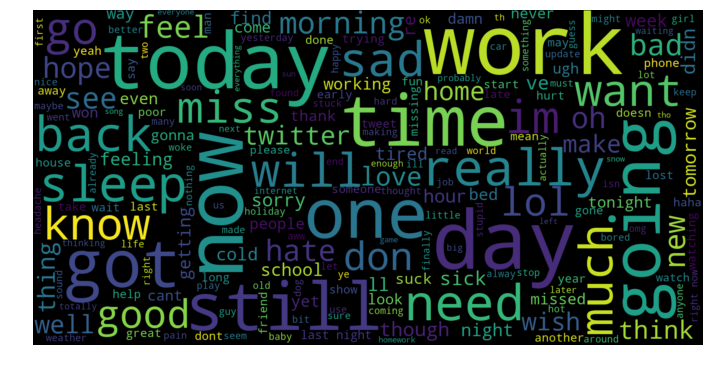

In [109]:
neg_tweets = training[training.polarity == 0]
neg_string = []
for t in neg_tweets.text:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


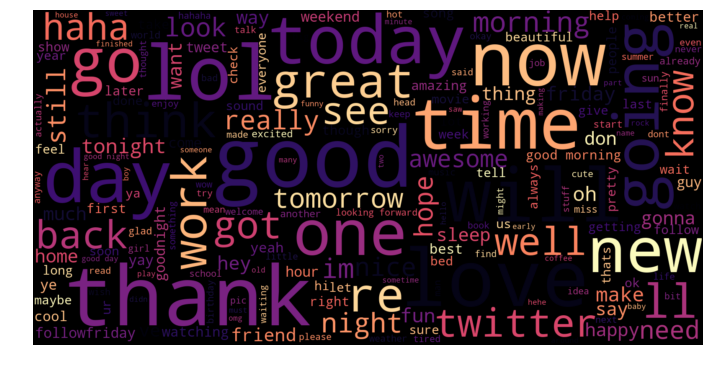

In [110]:
pos_tweets = training[training.polarity == 4]
pos_string = []
for t in pos_tweets.text:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='magma').generate(pos_string) 
plt.figure(figsize=(12,10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.show()


# Baseline models

## Blind prediction

If a classifier predicts negative for every validation data, it will get 48.72% accuracy.

In [66]:
#print("Train set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(X_train),len(X_train[y_train == 0]) / (len(X_train)*1.))*100, len(X_train[y_train == 1]) / (len(X_train)*1.))*100))
print("Length of training data:", len(X_train))
print("Training - Negative polarity percentage:", len(X_train[y_train == 0]) / (len(X_train)*1.)*100)
print("Traiing - Positive polarity percentage:", len(X_train[y_train == 4]) / (len(X_train)*1.)*100)

Length of training data: 7500
Training - Negative polarity percentage: 49.57333333333334
Traiing - Positive polarity percentage: 50.42666666666666


In [67]:
print("Length of test data:", len(X_test))
print("Test - Negative polarity percentage:", len(X_test[y_test == 0]) / (len(X_test)*1.)*100)
print("Test - Positive polarity percentage:", len(X_test[y_test == 4]) / (len(X_test)*1.)*100)

Length of test data: 2500
Test - Negative polarity percentage: 51.28
Test - Positive polarity percentage: 48.72


In [313]:
results.loc[len(results)] = ["Blind Prediction", "50.0", "50.0", "---", 
                  "---", "---", "---", "---"]

In [314]:
results

,ExpID,Train Accuracy (Mean),Test Accuracy,F1 score,p-value,Train Time(s),Test Time(s),Experiment description
0,Blind Prediction,50.0,50.0,---,---,---,---,---


## Using Afinn

In [70]:
from afinn import Afinn

In [71]:
afinn = Afinn()

In [72]:
#index = [i for i in range(1, len(X_train)+1)]
#X_train_afinn = pd.DataFrame(X_train, index = [index], columns = "text")
X_train_afinn = X_train

In [75]:
X_train_afinn.head()

6165    wondering why i am so stupid need to eat more ...
9270                            is awake and shouldn t be
8568                 sadness but please keep updating hug
7395    oh balls i forgot all about your article in th...
1657                                 njoying this morning
Name: text, dtype: object

In [76]:
X_train_afinn.columns = ["text"]

In [77]:
X_train_afinn.head()

6165    wondering why i am so stupid need to eat more ...
9270                            is awake and shouldn t be
8568                 sadness but please keep updating hug
7395    oh balls i forgot all about your article in th...
1657                                 njoying this morning
Name: text, dtype: object

In [78]:
#xa = pd.DataFrame({'text':X_train_afinn.values})
df1 = pd.DataFrame(X_train_afinn, columns=['text'])

In [82]:
X_train_afinn = df1


In [83]:
X_train_afinn.head()

,text
6165,wondering why i am so stupid need to eat more ...
9270,is awake and shouldn t be
8568,sadness but please keep updating hug
7395,oh balls i forgot all about your article in th...
1657,njoying this morning


In [84]:
pscore = []

for text in X_train_afinn["text"]:
    pscore.append(afinn.score(text))
    
pscore[:5]

[-4.0, 0.0, 3.0, -1.0, 0.0]

In [85]:
X_train_afinn['pscore'] = pscore
X_train_afinn.head()

,text,pscore
6165,wondering why i am so stupid need to eat more ...,-4.0
9270,is awake and shouldn t be,0.0
8568,sadness but please keep updating hug,3.0
7395,oh balls i forgot all about your article in th...,-1.0
1657,njoying this morning,0.0


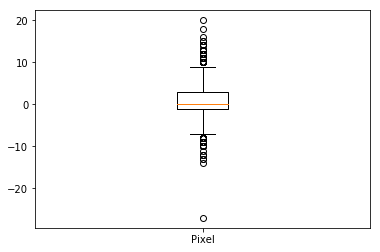

In [86]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.boxplot([X_train_afinn['pscore']],labels=["Pixel"])
plt.show()

In [87]:
dfin = X_train_afinn

In [88]:
dfin.head()

,text,pscore
6165,wondering why i am so stupid need to eat more ...,-4.0
9270,is awake and shouldn t be,0.0
8568,sadness but please keep updating hug,3.0
7395,oh balls i forgot all about your article in th...,-1.0
1657,njoying this morning,0.0


In [89]:
dfin.loc[dfin['pscore'] > 0, 'pscore'] = 1

In [90]:
dfin[:50]

,text,pscore
6165,wondering why i am so stupid need to eat more ...,-4.0
9270,is awake and shouldn t be,0.0
8568,sadness but please keep updating hug,1.0
7395,oh balls i forgot all about your article in th...,-1.0
1657,njoying this morning,0.0
6323,why do people keep following me and then rando...,-3.0
2678,checkin out selg s duet wiff ftsk whoa oh,0.0
4629,you rang,0.0
9191,dude i have to go on a mile run in cold ass bo...,-7.0
2805,i said bad ass but thanks,-5.0


In [91]:
dfin.loc[dfin['pscore'] < 0, 'pscore'] = -1

In [92]:
dfin[:50]

,text,pscore
6165,wondering why i am so stupid need to eat more ...,-1.0
9270,is awake and shouldn t be,0.0
8568,sadness but please keep updating hug,1.0
7395,oh balls i forgot all about your article in th...,-1.0
1657,njoying this morning,0.0
6323,why do people keep following me and then rando...,-1.0
2678,checkin out selg s duet wiff ftsk whoa oh,0.0
4629,you rang,0.0
9191,dude i have to go on a mile run in cold ass bo...,-1.0
2805,i said bad ass but thanks,-1.0


In [93]:
#Afinn polarity based prediction accuracy
afinn_pred = dfin["pscore"]

In [94]:
afinn_pred

6165   -1.0
9270    0.0
8568    1.0
7395   -1.0
1657    0.0
6323   -1.0
2678    0.0
4629    0.0
9191   -1.0
2805   -1.0
2503    0.0
6225   -1.0
9236    0.0
6569    0.0
4649    0.0
7295   -1.0
9656   -1.0
5486   -1.0
6642    0.0
942     1.0
8105    1.0
2974    1.0
5021   -1.0
5301   -1.0
994     1.0
6971    1.0
2075    1.0
1691    1.0
4678    1.0
2901    1.0
       ... 
9510    1.0
2796    1.0
6579   -1.0
7649    1.0
3140    1.0
3509    1.0
3992    1.0
9724    1.0
9201    0.0
4701    1.0
4102    1.0
2304    0.0
5730   -1.0
270     1.0
1613    0.0
8831   -1.0
1096    0.0
5821   -1.0
8079    1.0
9936    0.0
6092   -1.0
9373   -1.0
5753    1.0
4114    0.0
6762   -1.0
295     1.0
3885    1.0
6761    0.0
5832    1.0
9463   -1.0
Name: pscore, Length: 7500, dtype: float64

In [95]:
y_train[:5]

6165    0
9270    0
8568    0
7395    0
1657    4
Name: polarity, dtype: int64

In [96]:
dfy = pd.DataFrame(y_train.values, index = y_train.index, columns=['polarity'])

In [97]:
dfy[:5]

,polarity
6165,0
9270,0
8568,0
7395,0
1657,4


In [98]:
y_train = dfy
y_train[:5]

,polarity
6165,0
9270,0
8568,0
7395,0
1657,4


In [99]:
y_train.loc[y_train['polarity'] ==4, 'polarity'] = 1

In [100]:
y_train.loc[y_train['polarity'] ==0, 'polarity'] = -1

In [101]:
y_train.head()

,polarity
6165,-1
9270,-1
8568,-1
7395,-1
1657,1


In [102]:
accuracy_score(y_train, afinn_pred)

0.4884

In [315]:
results.loc[len(results)] = ["Prediction based on polarity - Afinn", "48.8", "---", "---", 
                  "---", "---", "---", "Afinn module"]

In [316]:
results

,ExpID,Train Accuracy (Mean),Test Accuracy,F1 score,p-value,Train Time(s),Test Time(s),Experiment description
0,Blind Prediction,50.0,50.0,---,---,---,---,---
1,Prediction based on polarity - Afinn,48.8,---,---,---,---,---,Afinn module


## Using textblob

In [4]:
trial = pd.read_csv("dataNov25final.csv", index_col=0)
trialtweet = trial

In [5]:
trialtweet = trial['tweet_text'].values

In [6]:
trialtweet[0]

'"All the pixel killers must be in church." - My husband as he\'s waiting for a que in blackops 4'

In [27]:
from textblob import TextBlob 

In [40]:
def get_tweet_sentiment(tweet): 
        ''' 
        Utility function to classify sentiment of passed tweet 
        using textblob's sentiment method 
        '''
        # create TextBlob object of passed tweet text 
        analysis = TextBlob(tweet) 
        # set sentiment 
        if analysis.sentiment.polarity > 0: 
            return 'positive'
        elif analysis.sentiment.polarity == 0: 
            return 'neutral'
        else: 
            return 'negative'

In [45]:
tweets = [] 
for tweet in trialtweet: 
    # empty dictionary to store required params of a tweet 
    parsed_tweet = {} 
  
    # saving text of tweet 
    parsed_tweet['text'] = tweet
    # saving sentiment of tweet 
    parsed_tweet['sentiment'] = get_tweet_sentiment(tweet)
    tweets.append(parsed_tweet) 
  
    

In [48]:
# picking positive tweets from tweets 
ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive'] 
# percentage of positive tweets 
print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets))) 
# picking negative tweets from tweets 
ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative'] 
# percentage of negative tweets 
print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets))) 
# percentage of neutral tweets 
#print("Neutral tweets percentage: {} %".format(100*len(tweets - ntweets - ptweets)/len(tweets))) 
  
# printing first 5 positive tweets 
print("\n\nPositive tweets:") 
for tweet in ptweets[:10]: 
    print(tweet['text'])
# printing first 5 negative tweets
print("\n\nNegative tweets:") 
for tweet in ntweets[:10]: 
    print(tweet['text']) 

Positive tweets percentage: 41.067285382830626 %
Negative tweets percentage: 14.215003866976025 %


Positive tweets:
"An obsession with pixel perfect rendering is futile."

555 เจ็บปวดแต่จริง
"Far away fields are greener, but Irishness runs deep"
First attempt at pixel art!

Let me know your opinions on it… https://t.co/jLzH4xTwmt
"I know not everyone can afford Paint and Aseprite, but worry not! #santria has got you covered for the most in-dep… https://t.co/jZ3gnHOK0c
"If you beat all the bonus stages you can get a super form and move super fast. Oh except you can still fall off th… https://t.co/PturN0hvcx
"Pixel Trapped: Halloween Fog" #FREE Today https://t.co/mVzfKbDnzo #books https://t.co/AGnTIrtHyl
"Staff Of Light" Pixel Art Animation by me. https://t.co/runTw4kBAR
"This looks like a cool game...right?"

#pixelart #pixel_art #pixelartist #pixel_artist #pixel #pixels https://t.co/STy4RDfdcV
"[Price mistake?] Pixel 3 and Pixel 3 XL glass screen protectors from Caseology are free rig

In [105]:
X_train[:5]

6165    wondering why i am so stupid need to eat more ...
9270                            is awake and shouldn t be
8568                 sadness but please keep updating hug
7395    oh balls i forgot all about your article in th...
1657                                 njoying this morning
Name: text, dtype: object

In [106]:
from textblob import TextBlob
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
tbresult = [TextBlob(text).sentiment.polarity for text in X_train]
tbpred = [0 if n < 0 else 1 for n in tbresult]
conmat = np.array(confusion_matrix(y_train, tbpred, labels=[1,0]))
confusion = pd.DataFrame(conmat, index=['positive', 'negative'],
                         columns=['predicted_positive','predicted_negative'])
print("Accuracy Score: {0:.2f}%".format(accuracy_score(y_train, tbpred)*100))
print("-"*80)
print("Confusion Matrix\n")
print(confusion)
print("-"*80)
print("Classification Report\n")
print(classification_report(y_train, tbpred))

Accuracy Score: 45.08%
--------------------------------------------------------------------------------
Confusion Matrix

          predicted_positive  predicted_negative
positive                3381                 401
negative                   0                   0
--------------------------------------------------------------------------------
Classification Report

             precision    recall  f1-score   support

         -1       0.00      0.00      0.00      3718
          0       0.00      0.00      0.00         0
          1       0.58      0.89      0.70      3782

avg / total       0.29      0.45      0.35      7500



/opt/conda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


## Results

In [317]:
results.loc[len(results)] = ["Prediction based on polarity - Textblob", "45.08", "---", "---", 
                  "---", "---", "---", "Textblob module"]

In [318]:
results

,ExpID,Train Accuracy (Mean),Test Accuracy,F1 score,p-value,Train Time(s),Test Time(s),Experiment description
0,Blind Prediction,50.0,50.0,---,---,---,---,---
1,Prediction based on polarity - Afinn,48.8,---,---,---,---,---,Afinn module
2,Prediction based on polarity - Textblob,45.08,---,---,---,---,---,Textblob module


# Supervised Machine Learning Models

Below is the updated datacleaning function. The order of the cleaning is

- Souping
- BOM removing
- url address(‘http:’pattern), twitter ID removing
- url address(‘www.'pattern) removing
- lower-case
- removing numbers and special characters
- tokenizing and joining

In [319]:
resultsML = pd.DataFrame(columns=["Model", "Key Params", "Train Accuracy", "Test Accuracy",
                                  "F1_score", 
                                "Precision", "Recall", "p-value",                     
                                "Train Time(s)", "Test Time(s)", "Experiment description"])


## Untuned SVM

In [156]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3057)


In [321]:
X_train[:5]

6165    wondering why i am so stupid need to eat more ...
9270                            is awake and shouldn t be
8568                 sadness but please keep updating hug
7395    oh balls i forgot all about your article in th...
1657                                 njoying this morning
Name: text, dtype: object

In [322]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer()

X_svc = tv.fit_transform(X_train)

In [323]:
clf = SVC(kernel="linear")
clf.fit(X_svc, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [324]:
#tweet_tfidf = tv.transform(dataNov25fin['tweet_text'])

In [325]:
train_pred = clf.predict(X_svc)

In [329]:
acc_train = (accuracy_score(y_train, train_pred))
acc_train

0.9082666666666667

In [330]:
svc_test = tv.transform(X_test)

In [331]:
test_pred = clf.predict(svc_test)

In [332]:
from collections import Counter
print(Counter(y_test))

Counter({0: 1282, 4: 1218})


In [333]:
confusion_matrix(y_test, test_pred)

array([[953, 329],
       [320, 898]])

In [334]:
acc_test = (accuracy_score(y_test, test_pred))
acc_test

0.7404

In [341]:
uSVM_prec = precision_score(y_test, test_pred, average='micro')
uSVM_recall = recall_score(y_test, test_pred, average='micro')
uSVM_f1 = f1_score(y_test, test_pred, average='micro')

In [342]:
resultsML.loc[len(resultsML)] = ["Untuned SVM", "---", acc_train, acc_test, uSVM_f1, 
                                  uSVM_prec, uSVM_recall, 
                  "---", "---", "---", "Without hyper parameter tuning"]

In [343]:
resultsML

,Model,Key Params,Train Accuracy,Test Accuracy,F1_score,Precision,Recall,p-value,Train Time(s),Test Time(s),Experiment description
0,Untuned SVM,---,0.908267,0.7404,"[0.7459882583170254, 0.7345603271983641]","[0.7486252945797329, 0.7318663406682967]","[0.7433697347893916, 0.7372742200328407]",---,---,---,Without hyper parameter tuning
1,Untuned SVM,---,0.908267,0.7404,0.7404,0.7404,0.7404,---,---,---,Without hyper parameter tuning


## SVM Using Pipeline and Gridsearch

In [344]:
from time import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [345]:
X_train[:2]

6165    wondering why i am so stupid need to eat more ...
9270                            is awake and shouldn t be
Name: text, dtype: object

In [226]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),  #http://scikit-learn.org/stable/modules/feature_extraction.html
    #('tfidf', TfidfTransformer()), 
    ('clf', SVC(kernel="linear")),  
])

In [227]:
parameters = { #listed in the form of "step__parameter", e.g, clf__penalty
    #'vect__max_df': (0.5, 0.75, 1.0),
    #'vect__max_features': (None, 500),
    'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams (single words) or bigrams (or sequence of words of length 2)
    #'tfidf__use_idf': (True, False),
    #'tfidf__norm': ('l1', 'l2'),
    #'clf__alpha': (0.00001, 0.000001),
    #'clf__penalty': ('l1', 'l2', 'elasticnet'),
    #'clf__loss': ('log', 'hinge'),  #hinge linear SVM
    #'clf__max_iter': (2)
    #'clf__n_iter': (10, 50)
}

In [228]:
grid_search = GridSearchCV(pipeline, parameters, cv=3, n_jobs=-1, verbose=1)

In [229]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   20.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   20.6s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'vect__ngram_range': ((1, 1), (1, 2))},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [348]:
best = grid_search.best_params_
best

{'vect__ngram_range': (1, 2)}

In [230]:
gs_pred = grid_search.predict(X_train)

In [349]:
gs_pred

array([0, 0, 0, ..., 0, 0, 0])

In [350]:
tsvm_acc_train = (accuracy_score(y_train, gs_pred))
tsvm_acc_train

0.9977333333333334

In [351]:
gs_test_pred = grid_search.predict(X_test)

In [352]:
gs_test_pred

array([4, 4, 4, ..., 0, 4, 0])

In [353]:
tsvm_acc_test = (accuracy_score(y_test, gs_test_pred))
tsvm_acc_test

0.7424

In [236]:
from collections import Counter
print(Counter(y_test))

Counter({0: 1282, 4: 1218})


In [357]:
cm = confusion_matrix(y_test, gs_test_pred)
cm

array([[934, 348],
       [296, 922]])

In [358]:
xticklabels=["Positive", "Negative"]
yticklabels=["Positive", "Negative"]

Text(0.5,1,'Test')

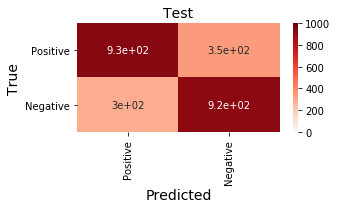

In [367]:
plt.figure(figsize=(10, 2))

plt.subplot(121)
g = sns.heatmap(cm, vmin=0, vmax=1000, annot=True, cmap="Reds")
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("True", fontsize=14)
g.set_xticklabels(xticklabels, rotation = 90)
g.set_yticklabels(yticklabels, rotation = 0)
plt.title("Test", fontsize=14)

In [354]:
tSVM_prec = precision_score(y_test, gs_test_pred, average='micro')
tSVM_recall = recall_score(y_test, gs_test_pred, average='micro')
tSVM_f1 = f1_score(y_test, gs_test_pred, average='micro')

In [355]:
resultsML.loc[len(resultsML)] = ["tuned uni/bigram SVM", best, tsvm_acc_train, tsvm_acc_test, tSVM_f1, 
                                  tSVM_prec, tSVM_recall, 
                  "---", "---", "---", "Tuned for Uni/bigrams"]

In [356]:
resultsML

,Model,Key Params,Train Accuracy,Test Accuracy,F1_score,Precision,Recall,p-value,Train Time(s),Test Time(s),Experiment description
0,Untuned SVM,---,0.908267,0.7404,"[0.7459882583170254, 0.7345603271983641]","[0.7486252945797329, 0.7318663406682967]","[0.7433697347893916, 0.7372742200328407]",---,---,---,Without hyper parameter tuning
1,Untuned SVM,---,0.908267,0.7404,0.7404,0.7404,0.7404,---,---,---,Without hyper parameter tuning
2,tuned uni/bigram SVM,"{'vect__ngram_range': (1, 2)}",0.997733,0.7424,0.7424,0.7424,0.7424,---,---,---,Tuned for Uni/bigrams


## SGDClassifier

In [371]:
X_train.shape

(7500,)

In [215]:
# This code is adopted  and has been modified from 
#
# Author: Olivier Grisel <olivier.grisel@ensta.org>
#         Peter Prettenhofer <peter.prettenhofer@gmail.com>
#         Mathieu Blondel <mathieu@mblondel.org>
# License: BSD 3 clause

from __future__ import print_function

from pprint import pprint
from time import time
import logging

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
%matplotlib inline

print(__doc__)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')


# #############################################################################
# Load some categories from the training set 
#categories = [
    #'alt.atheism',
    #'talk.religion.misc',
#]
# Uncomment the following to do the analysis on all the categories


# #############################################################################
# Define a pipeline combining a text feature extractor with a simple
# classifier
pipeline = Pipeline([
    ('vect', CountVectorizer()),  #http://scikit-learn.org/stable/modules/feature_extraction.html
    ('tfidf', TfidfTransformer()), #ignore for now
    ('clf', SGDClassifier()),  #let's use logistic regression
])

# uncommenting more parameters will give better exploring power but will
# increase processing time in a combinatorial way
parameters = { #listed in the form of "step__parameter", e.g, clf__penalty
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__max_features': (None, 500),
    'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams (single words) or bigrams (or sequence of words of length 2)
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'clf__alpha': (0.00001, 0.000001),
    'clf__penalty': ('l1', 'l2', 'elasticnet'),
    'clf__loss': ('log', 'hinge'),  #hinge linear SVM
    #'clf__max_iter': (2)
    'clf__n_iter': (10, 50)
}

if __name__ == "__main__":
    # multiprocessing requires the fork to happen in a __main__ protected
    # block

    # find the best parameters for both the feature extraction and the
    # classifier
    # n_jobs=-1 means that the computation will be dispatched on all the CPUs of the computer.
    #
    # By default, the GridSearchCV uses a 3-fold cross-validation. However, if it 
    #            detects that a classifier is passed, rather than a regressor, it uses a stratified 3-fold.
    grid_search = GridSearchCV(pipeline, parameters, cv=3, n_jobs=-1, verbose=1)

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(parameters)
    t0 = time()
    grid_search.fit(X_train, y_train)
    print("done in %0.3fs" % (time() - t0))
    print()
    #print("grid_search.cv_results_", grid_search.cv_results_)
    #estimator : estimator object. This is assumed to implement the scikit-learn estimator interface.  
    #            Either estimator needs to provide a score function, or scoring must be passed.
    #Accuracy is the default for classification; feel free to change this to precision, recall, fbeta
    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

Automatically created module for IPython interactive environment
Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'clf__alpha': (1e-05, 1e-06),
 'clf__loss': ('log', 'hinge'),
 'clf__n_iter': (10, 50),
 'clf__penalty': ('l1', 'l2', 'elasticnet'),
 'tfidf__norm': ('l1', 'l2'),
 'tfidf__use_idf': (True, False),
 'vect__max_df': (0.5, 0.75, 1.0),
 'vect__max_features': (None, 500),
 'vect__ngram_range': ((1, 1), (1, 2))}
Fitting 3 folds for each of 1152 candidates, totalling 3456 fits


/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.7min
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/s

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: 

[Parallel(n_jobs=-1)]: Done 3456 out of 3456 | elapsed: 11.5min finished


done in 687.863s

Best score: 0.744
Best parameters set:
	clf__alpha: 1e-06
	clf__loss: 'log'
	clf__n_iter: 10
	clf__penalty: 'l1'
	tfidf__norm: 'l1'
	tfidf__use_idf: True
	vect__max_df: 0.5
	vect__max_features: None
	vect__ngram_range: (1, 2)


/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [216]:
sgdc_preds_train = grid_search.predict(X_train)


In [217]:
sgdc_preds_test = grid_search.predict(X_test)

In [369]:
sgdc_preds_train

array([0, 0, 0, ..., 0, 0, 0])

In [376]:
sgdc_preds_test

array([0, 4, 4, ..., 0, 4, 0])

In [372]:
best_parameters

{'clf': SGDClassifier(alpha=1e-06, average=False, class_weight=None, epsilon=0.1,
        eta0=0.0, fit_intercept=True, l1_ratio=0.15,
        learning_rate='optimal', loss='log', max_iter=None, n_iter=10,
        n_jobs=1, penalty='l1', power_t=0.5, random_state=None,
        shuffle=True, tol=None, verbose=0, warm_start=False),
 'clf__alpha': 1e-06,
 'clf__average': False,
 'clf__class_weight': None,
 'clf__epsilon': 0.1,
 'clf__eta0': 0.0,
 'clf__fit_intercept': True,
 'clf__l1_ratio': 0.15,
 'clf__learning_rate': 'optimal',
 'clf__loss': 'log',
 'clf__max_iter': None,
 'clf__n_iter': 10,
 'clf__n_jobs': 1,
 'clf__penalty': 'l1',
 'clf__power_t': 0.5,
 'clf__random_state': None,
 'clf__shuffle': True,
 'clf__tol': None,
 'clf__verbose': 0,
 'clf__warm_start': False,
 'memory': None,
 'steps': [('vect',
   CountVectorizer(analyzer='word', binary=False, decode_error='strict',
           dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
           lowercase=True, max_df=0

In [377]:
sgdc_acc_train = (accuracy_score(y_train, sgdc_preds_train))
sgdc_acc_train

0.9930666666666667

In [378]:
sgdc_acc_test = (accuracy_score(y_test, sgdc_preds_test))
sgdc_acc_test

0.7556

In [222]:
from collections import Counter
print(Counter(y_test))

Counter({0: 1282, 4: 1218})


In [380]:
sgdc_cm = confusion_matrix(y_test, sgdc_preds_test)
sgdc_cm

array([[1013,  269],
       [ 342,  876]])

Text(0.5,1,'Test')

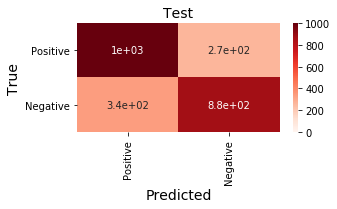

In [381]:
plt.figure(figsize=(10, 2))

plt.subplot(121)
g = sns.heatmap(sgdc_cm, vmin=0, vmax=1000, annot=True, cmap="Reds")
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("True", fontsize=14)
g.set_xticklabels(xticklabels, rotation = 90)
g.set_yticklabels(yticklabels, rotation = 0)
plt.title("Test", fontsize=14)

In [374]:
sgdc_best = ["clf__alpha: 1e-06", "clf__loss: 'log'",
            "clf__n_iter: 10",
             "clf__penalty: 'l1'",
             "tfidf__norm: 'l1'",
             "tfidf__use_idf: True",
             "vect__max_df: 0.5",
             "vect__max_features: None",
             "vect__ngram_range: (1, 2)"]

In [382]:
sgdc_prec = precision_score(y_test, sgdc_preds_test, average='micro')
sgdc_recall = recall_score(y_test, sgdc_preds_test, average='micro')
sgdc_f1 = f1_score(y_test, sgdc_preds_test, average='micro')

In [388]:
resultsML.loc[len(resultsML)] = ["tuned SGDC Classifier", sgdc_best, sgdc_acc_train, sgdc_acc_test, sgdc_f1, 
                                  sgdc_prec, sgdc_recall, 
                  "---", "687.8", "---", "Stochastic Gradient Descent Classifier"]

In [386]:
resultsML

,Model,Key Params,Train Accuracy,Test Accuracy,F1_score,Precision,Recall,p-value,Train Time(s),Test Time(s),Experiment description
0,Untuned SVM,---,0.908267,0.7404,"[0.7459882583170254, 0.7345603271983641]","[0.7486252945797329, 0.7318663406682967]","[0.7433697347893916, 0.7372742200328407]",---,---,---,Without hyper parameter tuning
1,Untuned SVM,---,0.908267,0.7404,0.7404,0.7404,0.7404,---,---,---,Without hyper parameter tuning
2,tuned uni/bigram SVM,"{'vect__ngram_range': (1, 2)}",0.997733,0.7424,0.7424,0.7424,0.7424,---,---,---,Tuned for Uni/bigrams
3,tuned SGDC Classifier,"[clf__alpha: 1e-06, clf__loss: 'log', clf__n_i...",0.993067,0.7556,0.7556,0.7556,0.7556,687.8,---,---,Stochastic Gradient Descent Classifier
4,tuned SGDC Classifier,"[clf__alpha: 1e-06, clf__loss: 'log', clf__n_i...",0.993067,0.7556,0.7556,0.7556,0.7556,---,687.8,---,Stochastic Gradient Descent Classifier


## SVM with Lemmatized dataset

In [281]:
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import WordNetLemmatizer 
tok = WordPunctTokenizer()
lem = WordNetLemmatizer() 

def lemcleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped_text = soup.get_text()
    text_rmat = re.sub(r'@[A-Za-z0-9]+','', souped_text)
    text_rmurl = re.sub('https?://[A-Za-z0-9./]+','',text_rmat)
    text_rmwww = re.sub(r'www.[^ ]+','',text_rmurl)
    text_rmhash = re.sub("[^a-zA-Z]", " ", text_rmwww)
    text_lower = text_rmhash.lower()
    tex_lem = lem.lemmatize(text_lower)
    
    # tokenize and join together to remove unneccessary white spaces
    text_words = tok.tokenize(tex_lem)
    return (" ".join(text_words)).strip()

In [391]:
lemtesting = df.text[:10000]
lemtest_result = []
for t in lemtesting:
    lemtest_result.append(lemcleaner(t))
len(lemtest_result)

10000

In [392]:
lemtest_result

['im greattt missing you to bits and of course still keeping with the large ness just for you',
 'nice the aim is max brenner at am a few guys are confirmed and a few are yeh maybe coffee is coffee but yum',
 'i m with you on that one honey',
 'i love that one',
 'english exam today boring eating cookies though and that s yummie follow me',
 'i am going to sleep now',
 'what a lovely day',
 'claire thanks missed you so glad to see you again',
 'waiting for the panthers to kick arse over the dargons',
 'just woke up it s nice to see s yellow gummy bear is back btw frappuccino blended cr me',
 'you re hilarious great job tonight',
 'morning just a wee reminder that you re on market kitchen today at pm pm then repeated tmrw at am pm and pm',
 'trader joe s has the best snacks you should try the freeze dried bananas too so much healthier than regular banana chips',
 'it s friday and the weather is beautiful in randers denmark we should go out for a beer later on',
 'oh iphone how i love th

In [393]:
df.head()

,polarity,tid,date,query,user,text
0,4,1957126372,Thu May 28 23:35:29 PDT 2009,NO_QUERY,ellemaypat,im greattt missing you to bits and of course s...
1,4,1957126410,Thu May 28 23:35:29 PDT 2009,NO_QUERY,alanjlee,nice the aim is max brenner at am a few guys a...
2,4,1957126480,Thu May 28 23:35:30 PDT 2009,NO_QUERY,davidnikel,i m with you on that one honey
3,4,1957126492,Thu May 28 23:35:30 PDT 2009,NO_QUERY,PinkerJewel,i love that one
4,4,1957126528,Thu May 28 23:35:30 PDT 2009,NO_QUERY,popkizz,english exam today boring eating cookies thoug...


In [394]:
lemtest = df

In [395]:
lemtest["text"] = lemtest_result

lemtest.shape

(10000, 6)

In [396]:
np.sum(lemtest.isnull().any(axis=1))

0

In [397]:
Xlem = lemtest['text']
ylem = lemtest['polarity']

In [398]:
Xlem, ylem = shuffle(Xlem, ylem)

Xlem, ylem = Xlem[:10000], ylem[:10000]

In [399]:
Xlem.head()

8741    i am missing my daughter she went away yesterd...
4117    sometimes i even fascinate myself as i stumle ...
9947    not much achieved time to rethink plans for da...
5316         michigan who i don t know them sigh shameful
3966    giving twitter client seesmic a test run so fa...
Name: text, dtype: object

In [400]:
ylem.head()

8741    0
4117    4
9947    0
5316    0
3966    4
Name: polarity, dtype: int64

In [401]:
#X = pd.DataFrame(X, index = y.index)

In [402]:
Xlem.shape

(10000,)

In [403]:
ylem.shape

(10000,)

In [404]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X_trainlem, X_testlem, y_trainlem, y_testlem = train_test_split(Xlem, ylem, test_size=0.25, random_state=3057)


In [405]:
X_trainlem.shape

(7500,)

In [406]:
X_trainlem.head()

9978    not having a car sucks what a bad week to get ...
8272    another assignment to be done an dinner with d...
4706    have you seen this stephen also handy for wadi...
2834                                been what famous haha
2145    the godfather trilogy movie review is now on c...
Name: text, dtype: object

In [407]:
y_train.shape

(7500,)

In [408]:
y_trainlem.head()

9978    0
8272    0
4706    4
2834    4
2145    4
Name: polarity, dtype: int64

In [409]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer()

X_svc = tv.fit_transform(X_trainlem)

In [410]:
clf = SVC(kernel="linear")
clf.fit(X_svc, y_trainlem)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [268]:
#tweet_tfidf = tv.transform(dataNov25fin['tweet_text'])

In [411]:
train_pred = clf.predict(X_svc)

In [421]:
acc_train = (accuracy_score(y_train, train_pred))
acc_train

0.4997333333333333

In [413]:
svc_test = tv.transform(X_testlem)

In [414]:
test_pred = clf.predict(svc_test)

In [415]:
from collections import Counter
print(Counter(y_test))

Counter({0: 1282, 4: 1218})


In [416]:
confusion_matrix(y_test, test_pred)

array([[656, 626],
       [617, 601]])

In [422]:
acc_test = (accuracy_score(y_test, test_pred))
acc_test

0.5028

In [418]:
lem_prec = precision_score(y_test, test_pred, average='micro')
lem_recall = recall_score(y_test, test_pred, average='micro')
lem_f1 = f1_score(y_test, test_pred, average='micro')

In [423]:
resultsML.loc[len(resultsML)] = ["SVM Classifier with lemmatized data", "---", acc_train, acc_test, lem_f1, 
                                  lem_prec, lem_recall, 
                  "---", "---", "---", "Less accuracy with lemmatized data"]

In [424]:
resultsML

,Model,Key Params,Train Accuracy,Test Accuracy,F1_score,Precision,Recall,p-value,Train Time(s),Test Time(s),Experiment description
0,Untuned SVM,---,0.908267,0.7404,"[0.7459882583170254, 0.7345603271983641]","[0.7486252945797329, 0.7318663406682967]","[0.7433697347893916, 0.7372742200328407]",---,---,---,Without hyper parameter tuning
1,Untuned SVM,---,0.908267,0.7404,0.7404,0.7404,0.7404,---,---,---,Without hyper parameter tuning
2,tuned uni/bigram SVM,"{'vect__ngram_range': (1, 2)}",0.997733,0.7424,0.7424,0.7424,0.7424,---,---,---,Tuned for Uni/bigrams
3,tuned SGDC Classifier,"[clf__alpha: 1e-06, clf__loss: 'log', clf__n_i...",0.993067,0.7556,0.7556,0.7556,0.7556,687.8,---,---,Stochastic Gradient Descent Classifier
4,tuned SGDC Classifier,"[clf__alpha: 1e-06, clf__loss: 'log', clf__n_i...",0.993067,0.7556,0.7556,0.7556,0.7556,---,687.8,---,Stochastic Gradient Descent Classifier
5,tuned SGDC Classifier,"[clf__alpha: 1e-06, clf__loss: 'log', clf__n_i...",0.993067,0.7556,0.7556,0.7556,0.7556,---,687.8,---,Stochastic Gradient Descent Classifier
6,SVM Classifier with lemmatized data,---,0.502800,0.7404,0.5028,0.5028,0.5028,---,---,---,Less accuracy with lemmatized data
7,SVM Classifier with lemmatized data,---,0.499733,0.5028,0.5028,0.5028,0.5028,---,---,---,Less accuracy with lemmatized data


## Untuned Logistic Regression

In [425]:
X_train.shape

(7500,)

In [ ]:
start = time()
full_pipeline_with_predictor.fit(X_train, y_train)

# Time and score training predictions
cv = ShuffleSplit(n_splits=30, test_size=0.3, random_state=0)
logit_scores = cross_val_score(full_pipeline_with_predictor, X_train, y_train, cv=cv)
logit_score_train = logit_scores.mean()
train_time = np.round(time() - start, 4)

# Time and score test predictions
start = time()
logit_score_test  = full_pipeline_with_predictor.score(X_test, y_test)
test_time = np.round(time() - start, 4)

# Visualizations

In [174]:
my_df = df[:1000]
neg_tweets = my_df[my_df.polarity == 0]
neg_string = []
for t in neg_tweets.text:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


AttributeError: 'DataFrame' object has no attribute 'polarity'

In [72]:
pos_tweets = my_df[my_df.polarity == 4]
pos_string = []
for t in pos_tweets.text:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='magma').generate(pos_string) 
plt.figure(figsize=(12,10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.show()


AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas